Building a Basic Chatbot

In [1]:
print("Hello, World!")

Hello, World!


In [3]:
from  typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START, END
from langgraph.graph.message import add_messages

In [4]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

graphbuilder=StateGraph(State)

In [5]:
graphbuilder

In [6]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [7]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="llama3-8b-8192")


In [8]:
## Node Functionality
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [9]:
graph_builder=StateGraph(State)

## Adding node
graph_builder.add_node("chatbot",chatbot)
## Adding Edges
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

## compile the graph
graph=graph_builder.compile()

In [10]:
response=graph.invoke({"messages":"Hii"})
response["messages"][-1].content

'Hi! How are you doing today?'

In [11]:
from langchain_tavily import TavilySearch
tool = TavilySearch(max_results=2)
tool.invoke("What is LangGraph?")

{'query': 'What is LangGraph?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'What is LangGraph? - IBM',
   'url': 'https://www.ibm.com/think/topics/langgraph',
   'content': 'LangGraph, created by LangChain, is an open source AI agent framework designed to build, deploy and manage complex generative AI agent workflows. At its core, LangGraph uses the power of graph-based architectures to model and manage the intricate relationships between various components of an AI agent workflow. LangGraph illuminates the processes within an AI workflow, allowing full transparency of the agent’s state. By combining these technologies with a set of APIs and tools, LangGraph provides users with a versatile platform for developing AI solutions and workflows including chatbots, state graphs and other agent-based systems. Nodes: In LangGraph, nodes represent individual components or agents within an AI workflow. LangGraph uses enhanced decision-making by modeling 

In [33]:
def multiply(a:int,b:int)->int:
    """Mutliply two numbers
    Args:
        a (int): First number
        b (int): Second number
    Returns:
        int: Product of a and b
    """
    return a*b

In [35]:
tools=[tool,multiply]

In [36]:
llm_with_tools = llm.bind_tools(tools)

In [37]:
llm_with_tools

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001B021AE6240>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001B023157110>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'Search query to look up', 'type': 'string'}, 'include_domains': {'anyOf': [{'items': {'type': 'string'}, 'type': 'array'}, {'type': 'null'}], 'default': [], 'description': 'A list 

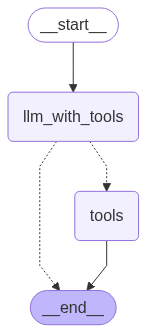

In [38]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode,tools_condition

builder=StateGraph(State)

def llm_with_tools_function(state:State):
    """Function to invoke LLM with tools"""
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

builder.add_node("llm_with_tools", llm_with_tools_function)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "llm_with_tools")
builder.add_conditional_edges("llm_with_tools", tools_condition)
builder.add_edge("tools", END)

graph_with_tools = builder.compile()
graph_with_tools

In [39]:
response=graph_with_tools.invoke({"messages":"What is recent ai news?"})

In [41]:
for m in response["messages"]:
    m.pretty_print()


================================ Human Message =================================

What is recent ai news?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (18g6dpgez)
 Call ID: 18g6dpgez
  Args:
    query: recent ai news
    search_depth: advanced
    time_range: day
    topic: news
================================= Tool Message =================================
Name: tavily_search

{"query": "recent ai news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://techcrunch.com/2025/06/20/mira-muratis-thinking-machines-lab-closes-on-2b-at-10b-valuation/", "title": "Mira Murati’s Thinking Machines Lab closes on $2B at $10B valuation - TechCrunch", "score": 0.6972179, "published_date": "Fri, 20 Jun 2025 21:59:33 GMT", "content": "Enterprise \n### Workhelix taps years of research to help enterprises figure out where to apply AI\n\n       Rebecca Szkutak\n\n Feb 27, 2025\n\nLatest in AI\n---------

In [42]:
response1=graph_with_tools.invoke({"messages":"What is 2 multiply 3?"})

In [43]:
for m in response1["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is 2 multiply 3?
================================== Ai Message ==================================
Tool Calls:
  multiply (3rs9kad56)
 Call ID: 3rs9kad56
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: multiply

6


In [46]:
response2=graph_with_tools.invoke({"messages":"What is 2 multiply 3 and then multiply by 10?"})

In [47]:
for m in response2["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is 2 multiply 3 and then multiply by 10?
================================== Ai Message ==================================
Tool Calls:
  multiply (tdkant88z)
 Call ID: tdkant88z
  Args:
    a: 2
    b: 3
  multiply (xgd7ac4wq)
 Call ID: xgd7ac4wq
  Args:
    a: 6
    b: 10
================================= Tool Message =================================
Name: multiply

6
================================= Tool Message =================================
Name: multiply

60


In [58]:
respone3=graph_with_tools.invoke({"messages":"What is 2 multiply 3 and then multiply by 10 and then  What is recent ai news?"})

In [59]:
for m in respone3["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is 2 multiply 3 and then multiply by 10 and then  What is recent ai news?
================================== Ai Message ==================================
Tool Calls:
  multiply (0s0xkwfxp)
 Call ID: 0s0xkwfxp
  Args:
    a: 2
    b: 3
  multiply (a3rqjbpa4)
 Call ID: a3rqjbpa4
  Args:
    a: 15
    b: 10
  tavily_search (7jd6sgypx)
 Call ID: 7jd6sgypx
  Args:
    query: recent ai news
================================= Tool Message =================================
Name: multiply

6
================================= Tool Message =================================
Name: multiply

150
================================= Tool Message =================================
Name: tavily_search

{"query": "recent ai news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "AI News | Latest Headlines and Developments | Reuters", "url": "https://www.reuters.com/technology/artificial-in

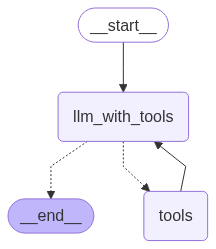

In [ ]:
#REACT # with tools
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode,tools_condition

builder=StateGraph(State)

def llm_with_tools_function(state:State):
    """Function to invoke LLM with tools"""
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

builder.add_node("llm_with_tools", llm_with_tools_function)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "llm_with_tools")
builder.add_conditional_edges("llm_with_tools", tools_condition)
builder.add_edge("tools", "llm_with_tools")
builder.add_edge("llm_with_tools", END)

graph_with_tools = builder.compile()
graph_with_tools

In [62]:
response=graph_with_tools.invoke({"messages":"What is 2 multiply 3 and then What is recent ai news?"})

In [63]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is 2 multiply 3 and then  What is recent ai news?
================================== Ai Message ==================================
Tool Calls:
  multiply (m15nyacvw)
 Call ID: m15nyacvw
  Args:
    a: 2
    b: 3
  tavily_search (bvhxjenqs)
 Call ID: bvhxjenqs
  Args:
    query: recent ai news
================================= Tool Message =================================
Name: multiply

6
================================= Tool Message =================================
Name: tavily_search

{"query": "recent ai news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "AI News | Latest Headlines and Developments | Reuters", "url": "https://www.reuters.com/technology/artificial-intelligence/", "content": "How Artificial Intelligence is creating the next normal. Information you can trust. Reuters, the news and media division of Thomson Reuters, is the world's largest multim

In [64]:
response=graph_with_tools.invoke({"messages":"Hi My name is Sriraj"})
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

Hi My name is Sriraj
================================== Ai Message ==================================

Nice to meet you, Sriraj!


In [65]:
response=graph_with_tools.invoke({"messages":"What is my name?"})
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is my name?
================================== Ai Message ==================================
Tool Calls:
  multiply (0npdmvvns)
 Call ID: 0npdmvvns
  Args:
    a: 1
    b: 0
================================= Tool Message =================================
Name: multiply

0
================================== Ai Message ==================================
Tool Calls:
  tavily_search (n3wwy1pdj)
 Call ID: n3wwy1pdj
  Args:
    query: What is my name?
================================= Tool Message =================================
Name: tavily_search

{"query": "What is my name?", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "What Does My Name Mean? The Meaning Of Names", "url": "https://www.names.org/", "content": "Names.org is a website that helps you discover the meaning, origin, popularity, and trends of your name. You can search by first name, last name, full name, 

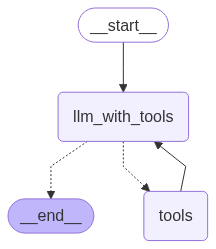

In [66]:
#REACT # with tools
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode,tools_condition
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

builder=StateGraph(State)

def llm_with_tools_function(state:State):
    """Function to invoke LLM with tools"""
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

builder.add_node("llm_with_tools", llm_with_tools_function)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "llm_with_tools")
builder.add_conditional_edges("llm_with_tools", tools_condition)
builder.add_edge("tools", "llm_with_tools")
builder.add_edge("llm_with_tools", END)

graph_with_tools = builder.compile(checkpointer=memory)
graph_with_tools

In [69]:
config={"configurable":{"thread_id":"1"}}
response=graph_with_tools.invoke({"messages":"Hii my name is Sriraj?"},config=config)
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

Hii my name is Sriraj?
================================== Ai Message ==================================

Nice to meet you, Sriraj!


In [71]:
response=graph_with_tools.invoke({"messages":"Hii what is my name?"},config=config)
print(response["messages"][-1].content)

Your name is Sriraj!


In [72]:
response=graph_with_tools.invoke({"messages":"Hii do you  remember my name?"},config=config)
print(response["messages"][-1].content)

I remember! Your name is Sriraj!
